## Problem Statement

Directing customers to subscription products through app behavior analysis. Here, we try to predict which members will not subscribe to the paid membership of the product after intial enrolment/free-trial duration. In this way we can put greater marketing efforts to such unlikely customers (like by providing additional offers) and try to convert them to active subscribers of the product. We also would avoid providing such additional offers to customers who are going to enroll anyway.

In [1]:
# Importing Libraries 

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time


dataset = pd.read_csv(r"..\data\appdata10.csv")

## Exploratory Data Analysis

In [2]:
# Viewing the Data
dataset.head(10) 

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [3]:
# Checking the distribution of Numerical Variables
dataset.describe() 

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# First set of feature cleaning - modifying the hour fiels
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [5]:
# Plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

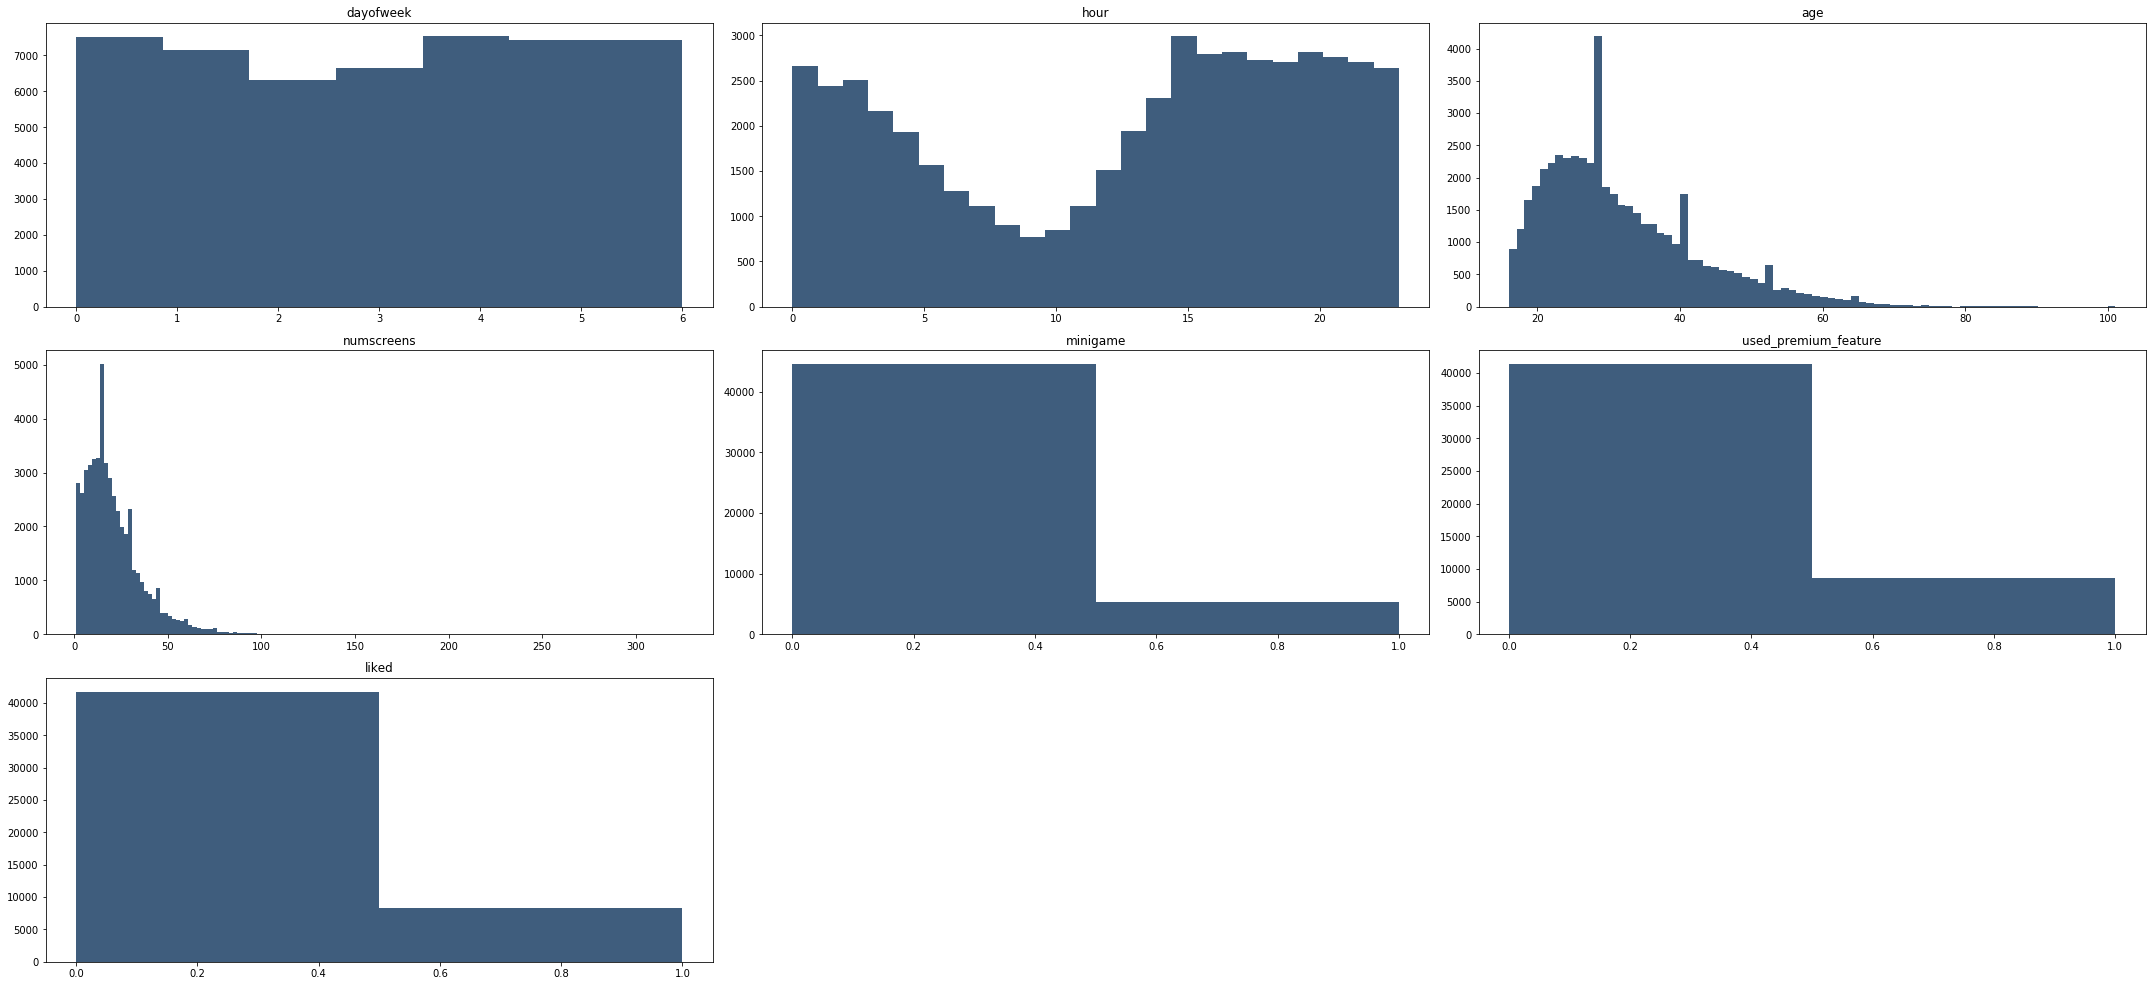

In [6]:
# Histograms, to familiarise ourselves with distribution of the data
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.figure(figsize=(30,15))
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(r'..\data\app_data_hist.jpg')


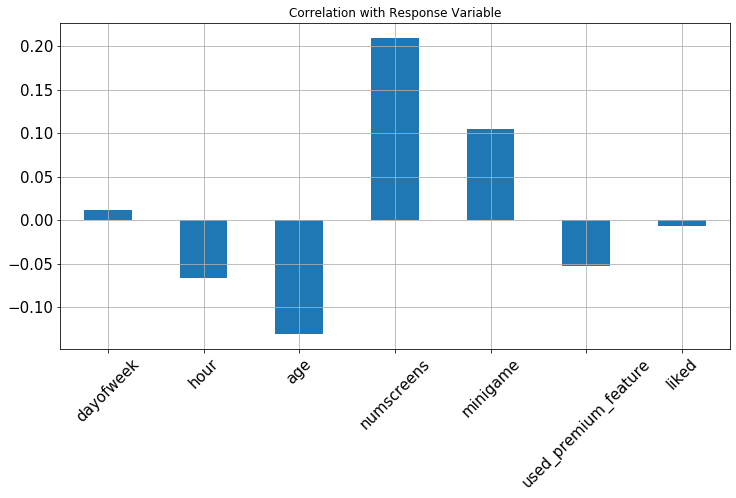

In [7]:
# Correlation of predictors with Response Variable (enrolled)
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(12,6),
                  title = 'Correlation with Response Variable',
                  fontsize = 15, rot = 45,
                  grid = True)


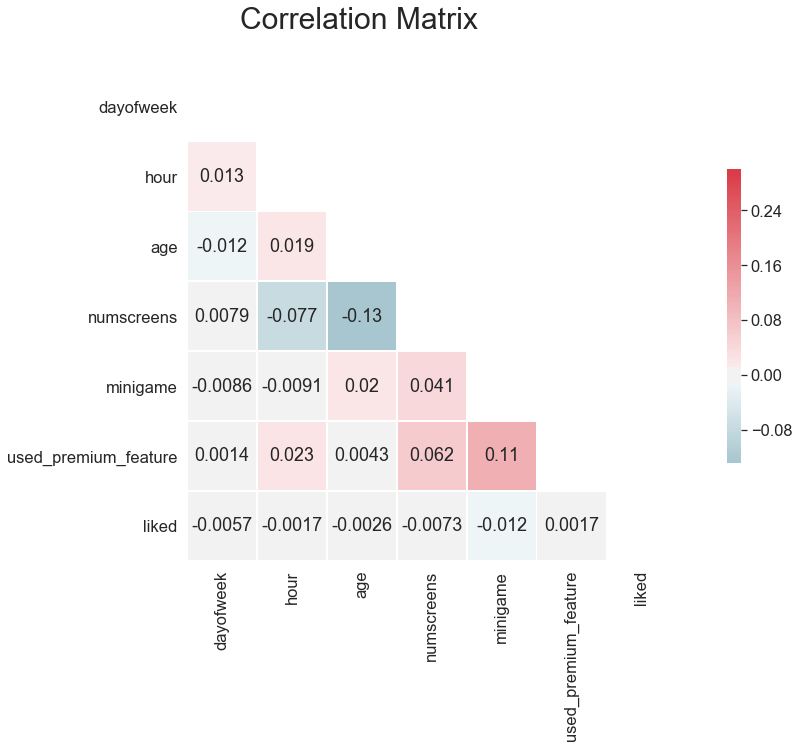

In [8]:
# Correlation Matrix - to analyse relationship within the features
sn.set(style="white", font_scale=1.5)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,9))
f.suptitle("Correlation Matrix", fontsize = 30)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

## Feature Engineering

To find the optimal time (i.e.,assign a limit to the time difference) when a user converts to a paid member.

In [9]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]] # since not all rows are populated and hence the if-else
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

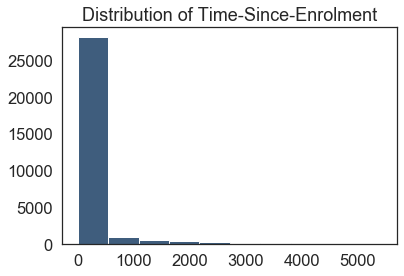

In [10]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]') # get optimal time difference in hours
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D') # get rid of NA values
plt.title('Distribution of Time-Since-Enrolment')
plt.show()

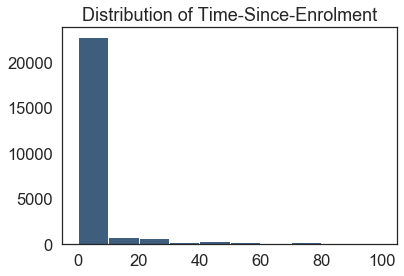

In [11]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100]) # plots values only within 0-100 hrs
plt.title('Distribution of Time-Since-Enrolment')
plt.show()

In [12]:
# check for subscription within two days of enrolment. if the subscription is after 48 hours of enrolment assign it value 0
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

Formatting the screen_list field. Considering the top screens visited by users.

In [13]:
# Load Top Screens
top_screens = pd.read_csv(r"..\data\top_screens.csv").top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [14]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ',' # the comma pro

# creating a column for each of the top screens
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

# indicate leftover screens not in the list of main screens
dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [15]:
# Funnels - group of screens belonging to the same set
# this is done to get rid of the screens that are correlated to each other. 
# so, similarly screens (correlated) are present in a single funnel [information pre-provided]

savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
# count of the saving screens
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
# drop individual columns
dataset = dataset.drop(columns=savings_screens)

#repecting for other correlated set of columns

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [16]:
# Saving Results 
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv(r"..\data\new_appdata10.csv", index = False)

## Data Pre-Processing

In [17]:
# importing dataset
dataset = pd.read_csv(r"..\data\new_appdata10.csv")

# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [19]:
## Balancing the Training Set
#import random
#y_train.value_counts()
#
#pos_index = y_train[y_train.values == 1].index
#neg_index = y_train[y_train.values == 0].index
#
#if len(pos_index) > len(neg_index):
#    higher = pos_index
#    lower = neg_index
#else:
#    higher = neg_index
#    lower = pos_index
#
#random.seed(0)
#higher = np.random.choice(higher, size=len(lower))
#lower = np.asarray(lower)
#new_indexes = np.concatenate((lower, higher))
#
#X_train = X_train.loc[new_indexes,]
#y_train = y_train[new_indexes]

In [20]:
# Removing Identifiers
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [21]:
# Feature Scaling - to prevent one numerical feature from having more influence than the other
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building

In [22]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1') # l1 lasso regularisation - penalises any particular field strongly related to the response variable
classifier.fit(X_train, y_train)

C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

The key difference between these two is the penalty term.

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. This technique works very well to avoid over-fitting issue.

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

(courtesy: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)

In [23]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.7681


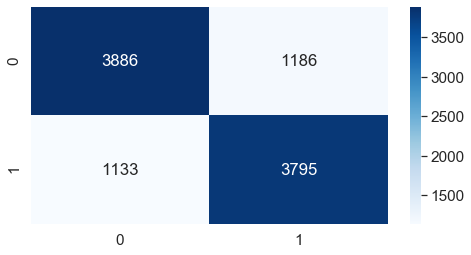

In [24]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

precision_score(y_test, y_pred) # tp / (tp + fp)

recall_score(y_test, y_pred) # tp / (tp + fn)

f1_score(y_test, y_pred)
"""
The F1 score can be interpreted as a weighted average (harmonic mean) of the precision and recall,
where an F1 score reaches its best value at 1 and worst score at 0. 
The relative contribution of precision and recall to the F1 score are equal.
"""

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Read: https://scikit-learn.org/stable/modules/model_evaluation.html

In [25]:
# Applying k-Fold Cross Validation - train and test the model on different subsets of the data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2)) # taking the mean of accuracy scores

C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

Logistic Accuracy: 0.767 (+/- 0.010)


In [26]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032574
1,hour,-0.003600
2,age,-0.149688
3,numscreens,-0.130597
4,minigame,-0.026462
5,used_premium_feature,-0.065907
6,liked,0.010695
7,location,-0.028331
8,Institutions,-0.062195
9,VerifyPhone,0.650341


## Model Tuning

In [27]:
# Grid Search (Round 1)

from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(rf_best_accuracy, rf_best_parameters)
print(grid_search.best_score_)

C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 25.22 seconds
0.7674 {'C': 0.01, 'penalty': 'l2'}
0.7674


In [28]:
# Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(rf_best_accuracy, rf_best_parameters)
print(grid_search.best_score_)

C:\Users\Sayandeep Ghosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 22.37 seconds
0.767225 {'C': 0.5, 'penalty': 'l2'}
0.767225


## Model Conclusion

In [29]:
# Formatting the final results
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)
final_results

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


## Conclusion

Based on new users installing the application, narrow marketing efforts to users unlikely to subscribe, and thus increase subscription rate. Maybe provide offers to these unlikely subscribers for increasing number of subscriptions.